In [11]:
import numpy as np
import torch
import jax
import matplotlib.pyplot as plt
import jax.numpy as jnp

# Numpy


In [12]:
def multiply_sin_cos(x1,x2):

    return np.sin(x1)*np.cos(x2) + np.sin(0.5*x1)*np.cos(0.5*x2)
vectorized_multiply_sin_cos = np.vectorize(multiply_sin_cos)
X = np.array([[0, np.pi / 4], [np.pi / 2, np.pi / 2], [np.pi, 0]])
x1 = X[:, 0]
x2 = X[:, 1]
vectorized_multiply_sin_cos(x1, x2)

array([0. , 0.5, 1. ])

In [13]:
def gradient_multiply_sin_cos(x1, x2):
    df_dx1 = np.cos(x1) * np.cos(x2) + 0.5 * np.cos(0.5 * x1) * np.cos(0.5 * x2)
    df_dx2 = -np.sin(x1) * np.sin(x2) - 0.5 * np.sin(0.5 * x1) * np.sin(0.5 * x2)
    return df_dx1, df_dx2

In [14]:
x1, x2 = np.pi / 4, np.pi / 2
gradient = gradient_multiply_sin_cos(x1, x2)
print("Gradient at (x1, x2) = (π/4, π/2):", gradient)

Gradient at (x1, x2) = (π/4, π/2): (0.3266407412190942, -0.8424058062230968)


In [15]:
def gradient_descent(initial_x1, initial_x2, learning_rate, num_iterations):
    x1, x2 = initial_x1, initial_x2
    x1_pos=[]
    x2_pos=[]
    for i in range(num_iterations):
        df_dx1, df_dx2 = gradient_multiply_sin_cos(x1, x2)
        x1 -= learning_rate * df_dx1
        x2 -= learning_rate * df_dx2
        x1_pos.append(x1)
        x2_pos.append(x2)
        if i % 100 == 0:  # Print progress every 100 iterations
            print(f"Iteration {i}: x1 = {x1}, x2 = {x2}, f(x1, x2) = {multiply_sin_cos(x1, x2)}")
    return x1, x2, x1_pos, x2_pos 

In [16]:
initial_x1, initial_x2 = 1.0, 1.0  # Initial values for x1 and x2
learning_rate = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations

final_x1, final_x2, x1_pos,x2_pos = gradient_descent(initial_x1, initial_x2, learning_rate, num_iterations)
print(f"Final values: x1 = {final_x1}, x2 = {final_x2}, f(x1, x2) = {multiply_sin_cos(final_x1, final_x2)}")

Iteration 0: x1 = 0.9932299784180654, x2 = 1.0082299784180653, f(x1, x2) = 0.8640273519778099
Iteration 100: x1 = 0.5271302003615193, x2 = 1.739356486548855, f(x1, x2) = 0.08366288293929222
Iteration 200: x1 = 0.6364047113065052, x2 = 2.305087200333028, f(x1, x2) = -0.2711499918963807
Iteration 300: x1 = 1.0611006016254774, x2 = 2.8701407012620535, f(x1, x2) = -0.7724621615791988
Iteration 400: x1 = 1.372492786257406, x2 = 3.224795808137775, f(x1, x2) = -1.0033633390268355
Iteration 500: x1 = 1.5188204039693625, x2 = 3.3845752933786093, f(x1, x2) = -1.0527543029106576
Iteration 600: x1 = 1.5838166092768482, x2 = 3.453768589255314, f(x1, x2) = -1.0622233803412173
Iteration 700: x1 = 1.6130991137252613, x2 = 3.4843621229068558, f(x1, x2) = -1.0641033794695693
Iteration 800: x1 = 1.626460161141943, x2 = 3.4981328411025245, f(x1, x2) = -1.0644887831867846
Iteration 900: x1 = 1.6325952698460933, x2 = 3.504395978542147, f(x1, x2) = -1.0645691982374004
Final values: x1 = 1.6354010096061777, x

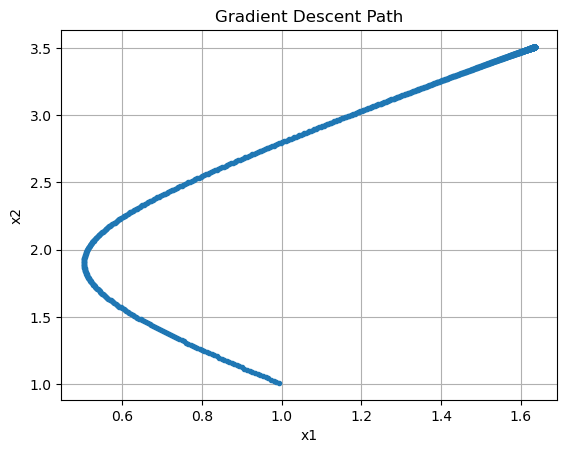

In [17]:
# Plotting the positions
plt.plot(x1_pos, x2_pos, marker='o', linewidth=0.5, markersize=3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Path')
plt.grid(True)
plt.show()

# Jax

Iteration 0: x1 = 0.9932299784180654, x2 = 1.0082299784180653, f(x1, x2) = 0.8640273809432983
Iteration 100: x1 = 0.5271302003615193, x2 = 1.739356486548855, f(x1, x2) = 0.08366288244724274
Iteration 200: x1 = 0.6364047113065052, x2 = 2.305087200333028, f(x1, x2) = -0.2711499333381653
Iteration 300: x1 = 1.0611006016254774, x2 = 2.8701407012620535, f(x1, x2) = -0.7724622488021851
Iteration 400: x1 = 1.372492786257406, x2 = 3.224795808137775, f(x1, x2) = -1.0033633708953857
Iteration 500: x1 = 1.5188204039693625, x2 = 3.3845752933786093, f(x1, x2) = -1.0527544021606445
Iteration 600: x1 = 1.5838166092768482, x2 = 3.453768589255314, f(x1, x2) = -1.0622234344482422
Iteration 700: x1 = 1.6130991137252613, x2 = 3.4843621229068558, f(x1, x2) = -1.064103364944458
Iteration 800: x1 = 1.626460161141943, x2 = 3.4981328411025245, f(x1, x2) = -1.0644887685775757
Iteration 900: x1 = 1.6325952698460933, x2 = 3.504395978542147, f(x1, x2) = -1.0645692348480225
Final values: x1 = 1.6354010096061777, x2

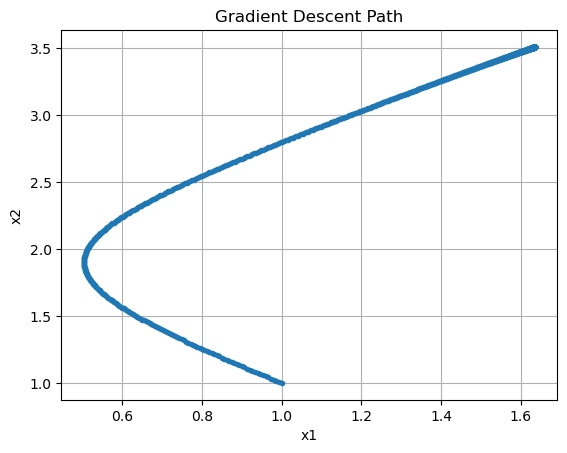

In [18]:
# Define the function
def multiply_sin_cos(x1, x2):
    return jnp.sin(x1) * jnp.cos(x2) + jnp.sin(0.5 * x1) * jnp.cos(0.5 * x2)

# Vectorize the function
vectorized_multiply_sin_cos = jax.vmap(multiply_sin_cos, in_axes=(0, 0))


# Gradient descent procedure
def gradient_descent(initial_x1, initial_x2, learning_rate, num_iterations):
    x1, x2 = initial_x1, initial_x2
    x1_positions = [x1]
    x2_positions = [x2]
    
    for i in range(num_iterations):
        df_dx1, df_dx2 = gradient_multiply_sin_cos(x1, x2)
        x1 -= learning_rate * df_dx1
        x2 -= learning_rate * df_dx2
        x1_positions.append(x1)
        x2_positions.append(x2)
        if i % 100 == 0:  # Print progress every 100 iterations
            print(f"Iteration {i}: x1 = {x1}, x2 = {x2}, f(x1, x2) = {multiply_sin_cos(x1, x2)}")
    
    return x1, x2, x1_positions, x2_positions

# Example usage
initial_x1, initial_x2 = 1.0, 1.0  # Initial values for x1 and x2
learning_rate = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations

final_x1, final_x2, x1_positions, x2_positions = gradient_descent(initial_x1, initial_x2, learning_rate, num_iterations)
print(f"Final values: x1 = {final_x1}, x2 = {final_x2}, f(x1, x2) = {multiply_sin_cos(final_x1, final_x2)}")

# Plotting the positions
plt.plot(x1_positions, x2_positions, marker='o', linewidth=0.5, markersize=3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Path')
plt.grid(True)
plt.show()

# pytorch

Iteration 0: x1 = 0.9932299852371216, x2 = 1.0082299709320068, f(x1, x2) = -1.0645860433578491
Iteration 100: x1 = 0.527130663394928, x2 = 1.7393569946289062, f(x1, x2) = -1.0645860433578491
Iteration 200: x1 = 0.6364060640335083, x2 = 2.305089235305786, f(x1, x2) = -1.0645860433578491
Iteration 300: x1 = 1.0611025094985962, x2 = 2.870142698287964, f(x1, x2) = -1.0645860433578491
Iteration 400: x1 = 1.372493863105774, x2 = 3.224797010421753, f(x1, x2) = -1.0645860433578491
Iteration 500: x1 = 1.518820881843567, x2 = 3.3845748901367188, f(x1, x2) = -1.0645860433578491
Iteration 600: x1 = 1.5838168859481812, x2 = 3.453767776489258, f(x1, x2) = -1.0645860433578491
Iteration 700: x1 = 1.6130988597869873, x2 = 3.484361410140991, f(x1, x2) = -1.0645860433578491
Iteration 800: x1 = 1.6264605522155762, x2 = 3.4981329441070557, f(x1, x2) = -1.0645860433578491
Iteration 900: x1 = 1.6325953006744385, x2 = 3.5043957233428955, f(x1, x2) = -1.0645860433578491


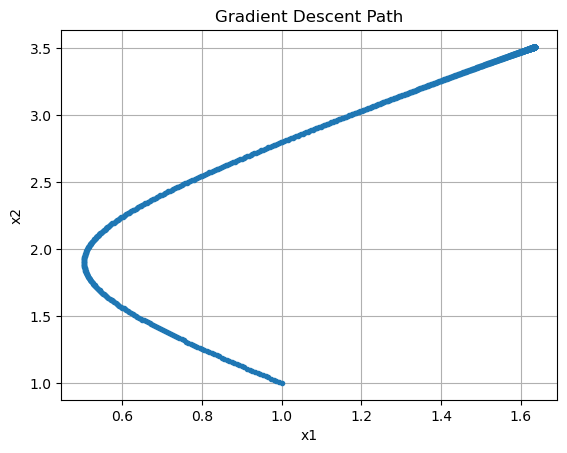

In [19]:
# Gradient descent procedure
def gradient_descent(initial_x1, initial_x2, learning_rate, num_iterations):
    x1 = torch.tensor(initial_x1)
    x2 = torch.tensor(initial_x2)
    x1_positions = [x1.item()]
    x2_positions = [x2.item()]
    for i in range(num_iterations):
        df_dx1, df_dx2 = gradient_multiply_sin_cos(x1, x2)
        x1 -= learning_rate * df_dx1
        x2 -= learning_rate * df_dx2
        
        # Store the positions
        x1_positions.append(x1.item())
        x2_positions.append(x2.item())
        
        if i % 100 == 0:  # Print progress every 100 iterations
            print(f"Iteration {i}: x1 = {x1.item()}, x2 = {x2.item()}, f(x1, x2) = {multiply_sin_cos(final_x1, final_x2)}")
    
    return x1.item(), x2.item(), x1_positions, x2_positions

# Example usage
initial_x1, initial_x2 = 1.0, 1.0  # Initial values for x1 and x2
learning_rate = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations

final_x1, final_x2, x1_positions, x2_positions = gradient_descent(initial_x1, initial_x2, learning_rate, num_iterations)
#print(f"Final values: x1 = {final_x1}, x2 = {final_x2}, f(x1, x2) = {multiply_sin_cos(final_x1,final_x2)}")

# Plotting the positions
plt.plot(x1_positions, x2_positions, marker='o', linewidth=0.5, markersize=3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Path')
plt.grid(True)
plt.show()

# add momentum and gradient norm

Iteration 0: x1 = 0.9932299852371216, x2 = 1.0082299709320068, f(x1, x2) = -1.0645906925201416, gradient_norm = 1.0656723976135254
Iteration 100: x1 = 0.6736786365509033, x2 = 2.3947510719299316, f(x1, x2) = -1.0645906925201416, gradient_norm = 0.6991201639175415
Iteration 200: x1 = 1.4388748407363892, x2 = 3.300266742706299, f(x1, x2) = -1.0645906925201416, gradient_norm = 0.23899395763874054
Iteration 300: x1 = 1.6045281887054443, x2 = 3.475651741027832, f(x1, x2) = -1.0645906925201416, gradient_norm = 0.03793513402342796
Iteration 400: x1 = 1.6320600509643555, x2 = 3.5038671493530273, f(x1, x2) = -1.0645906925201416, gradient_norm = 0.00646243616938591
Iteration 500: x1 = 1.636826992034912, x2 = 3.5086829662323, f(x1, x2) = -1.0645906925201416, gradient_norm = 0.0011213250691071153
Iteration 600: x1 = 1.6376583576202393, x2 = 3.509516954421997, f(x1, x2) = -1.0645906925201416, gradient_norm = 0.00019522436195984483
Iteration 700: x1 = 1.637803316116333, x2 = 3.509661912918091, f(x1,

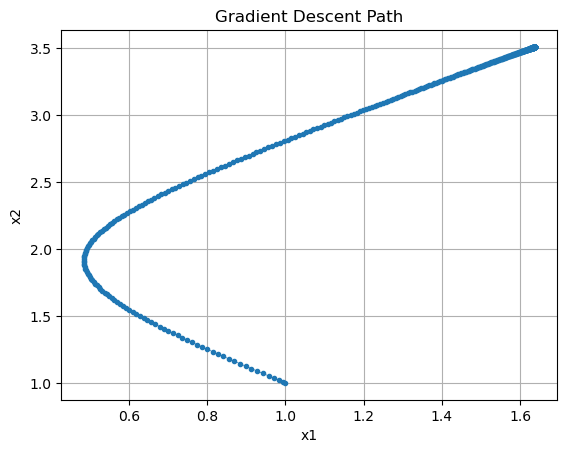

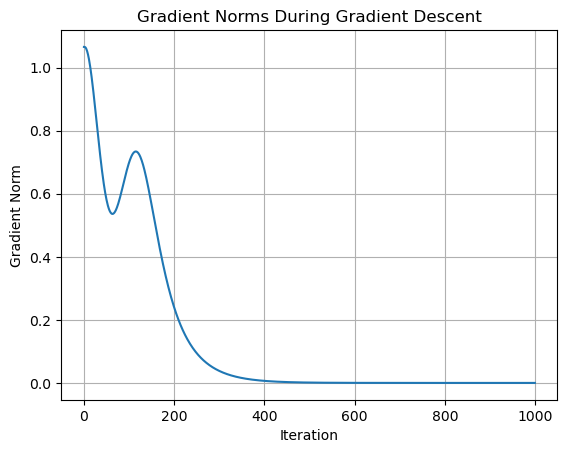

In [29]:
# Gradient descent procedure with momentum
def gradient_descent(initial_x1, initial_x2, learning_rate, num_iterations, momentum_factor=0.4):
    x1 = torch.tensor(initial_x1)
    x2 = torch.tensor(initial_x2)
    x1_positions = [x1.item()]
    x2_positions = [x2.item()]
    gradient_norms = []
    prev_gradients_x1 = [0, 0, 0]
    prev_gradients_x2 = [0, 0, 0]
    
    for i in range(num_iterations):
        df_dx1, df_dx2 = gradient_multiply_sin_cos(x1, x2)
        
        # Update the momentum terms
        momentum_x1 = momentum_factor * sum(prev_gradients_x1[-3:])
        momentum_x2 = momentum_factor * sum(prev_gradients_x2[-3:])
        
        # Update the parameters with momentum
        x1 -= learning_rate * (df_dx1 + momentum_x1)
        x2 -= learning_rate * (df_dx2 + momentum_x2)
        
        # Update the previous gradients
        prev_gradients_x1.append(df_dx1)
        prev_gradients_x2.append(df_dx2)
        
        # Compute the norm of the gradients
        gradient_norm = torch.sqrt(df_dx1**2 + df_dx2**2).item()
        gradient_norms.append(gradient_norm)
        
        # Store the positions
        x1_positions.append(x1.item())
        x2_positions.append(x2.item())
        
        if i % 100 == 0:  # Print progress every 100 iterations
            print(f"Iteration {i}: x1 = {x1.item()}, x2 = {x2.item()}, f(x1, x2) = {multiply_sin_cos(final_x1, final_x2)}, gradient_norm = {gradient_norm}")
    
    return x1.item(), x2.item(), x1_positions, x2_positions, gradient_norms

# Example usage
initial_x1, initial_x2 = 1.0, 1.0  # Initial values for x1 and x2
learning_rate = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations

final_x1, final_x2, x1_positions, x2_positions, gradient_norms = gradient_descent(initial_x1, initial_x2, learning_rate, num_iterations)
print(f"Final values: x1 = {final_x1}, x2 = {final_x2}, f(x1, x2) = {multiply_sin_cos(final_x1, final_x2)}")

# Plotting the positions
plt.plot(x1_positions, x2_positions, marker='o', linewidth=0.5, markersize=3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Gradient Descent Path')
plt.grid(True)
plt.show()

# Plotting the gradient norms
plt.plot(gradient_norms)
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norms During Gradient Descent')
plt.grid(True)
plt.show()